In [313]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os

sns.set_theme(style="whitegrid")

filepath = 'Data/'
level = 'Level3.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files = []
for p in participants:
    files.append(filepath+p+'/'+level)
print(files)


#combine different participant's same level data
data = []
for f in files:
    data.append(pd.read_csv(f))

#df = pd.concat(data)
df1 = pd.concat((data), ignore_index=True)
#df1.columns["Arousal1", "Valence1", "Expression1"]


#data1 = pd.read_csv('Data/sampleData.csv')
data2 = pd.read_csv('sampleData2.csv')
#data_full = pd.read_csv('Data/test.csv')

#noSub = data[data['Do you currently have an active World of Warcraft subscription?'] == 'No'].index
#data.drop(noSub, inplace=True)

#data.reset_index(inplace=True, drop=True) #reset index after dropped rows from full data

df1

['Participant1', 'Participant2']
['Data/Participant1/Level3.csv', 'Data/Participant2/Level3.csv']


,arousal,valence,expression
0,0.5,0.4,4
1,0.2,-0.3,3
2,-0.1,-0.1,8
3,-0.4,-0.4,6
4,-0.7,0.7,0
5,0.5,0.4,4
6,0.2,-0.3,3
7,-0.1,-0.1,8
8,-0.4,-0.4,6
9,-0.7,0.7,0


In [228]:
filepath = 'Data/'
level2 = 'Level2.csv'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find a specific level file inside the participant folder
files = []
for p in participants:
    files.append(filepath+p+'/'+level2)
print(files)


#combine different participant's same level data
data = []
for f in files:
    data.append(pd.read_csv(f))

#df = pd.concat(data)
df2 = pd.concat((data), ignore_index=True)

df2

['Participant1', 'Participant2']
['Data/Participant1/Level2.csv', 'Data/Participant2/Level2.csv']


,Valence,Arousal,Expression
0,0.611223,-0.008713,1
1,0.642722,-0.007217,1
2,0.561658,0.082811,1
3,0.608170,0.023815,1
4,0.677881,0.015501,1
...,...,...,...
1881,-0.099237,0.290128,7
1882,-0.024138,0.224016,7
1883,-0.050785,0.258184,7
1884,-0.077202,0.264294,7


In [229]:

#create a list of all levels
levelList = []
for i in range(1,18):
  levelList.append('level'+str(i))


levelDatasets = [df1, data2]


#create empty dataframes for all levels
d = {}
for i in levelDatasets:
  print(levelDatasets)
  for name in levelList:
      d[name] = pd.DataFrame(levelDatasets)
      d["level1"].append(df1)
      #print(d)


for name, df in d.items():
  d["level1"].append(df1)
  #print(name)
  

d["level1"].append(df1)
print(d["level2"])



[   arousal  valence  expression
0      0.5      0.4           4
1      0.2     -0.3           3
2     -0.1     -0.1           8
3     -0.4     -0.4           6
4     -0.7      0.7           0
5      0.5      0.4           4
6      0.2     -0.3           3
7     -0.1     -0.1           8
8     -0.4     -0.4           6
9     -0.7      0.7           0,       Valence   Arousal  Expression
0    0.012626  0.241269           7
1   -0.195107  0.263049           0
2    0.061991  0.201836           1
3    0.114016  0.180770           1
4    0.035768  0.222740           7
..        ...       ...         ...
113 -0.099237  0.290128           7
114 -0.024138  0.224016           7
115 -0.050785  0.258184           7
116 -0.077202  0.264294           7
117 -0.045673  0.254167           7

[118 rows x 3 columns]]
[   arousal  valence  expression
0      0.5      0.4           4
1      0.2     -0.3           3
2     -0.1     -0.1           8
3     -0.4     -0.4           6
4     -0.7      0.7         

C:\Users\DOVILĖ\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
C:\Users\DOVILĖ\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [230]:
levels = os.listdir('Data/Participant1/')

levels

['Level1.csv', 'Level2.csv', 'Level3.csv']

In [317]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

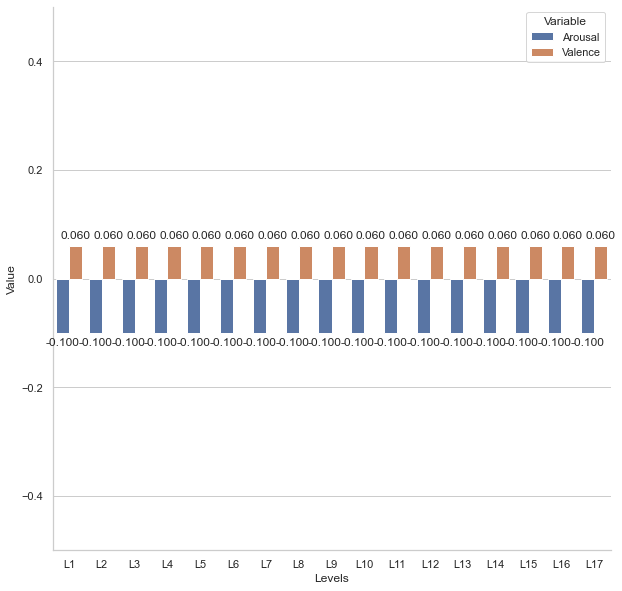

In [320]:
av = df1.iloc[:, 0:2] 

av2 = av.set_axis(['a1', 'v1'], axis=1, inplace=False)
av2

avplot = pd.DataFrame([
        ["L1", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L2", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L3", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L4", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L5", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L6", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L7", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L8", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L9", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L10", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L11", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L12", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L13", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L14", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L15", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L16", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()],
        ["L17", av2.iloc[:, 0].mean(), av2.iloc[:, 1].mean()]],  
        columns = ["Levels", "Arousal", "Valence"])

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = avplot.melt(id_vars='Levels').rename(columns=str.title)
sns.barplot(x='Levels', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1.yaxis.grid(True)
ax1.set_axisbelow(True)
plt.ylim(bottom = -1,top = 1)
add_value_labels(ax1)

In [294]:
#Arousal + Valence
av = df1.iloc[:, 0:2] 

#av["AV"] = av[["arousal","valence"]].apply(tuple, axis=1)
                
av1 = av[["arousal","valence"]].apply(tuple, axis=1)



av2 = av[["arousal","valence"]].apply(tuple, axis=1)

av3 = pd.DataFrame(av1)

av4 = pd.DataFrame(av2)
    
av3["av2"] = av4

av5.reset_index(inplace=True, drop=True)
av3

#tuples = list(av.itertuples(index=False, name=None))
#print(tuples)
#tuples

#av1 = av.iloc[:, 2] 
#print(av1)

#av2 = df1.iloc[:, 0:2] 
#av2["AV"] = av2[["arousal","valence"]].apply(tuple, axis=1)
         
       

            

,0,av2
0,"(0.5, 0.4)","(0.5, 0.4)"
1,"(0.2, -0.3)","(0.2, -0.3)"
2,"(-0.1, -0.1)","(-0.1, -0.1)"
3,"(-0.4, -0.4)","(-0.4, -0.4)"
4,"(-0.7, 0.7)","(-0.7, 0.7)"
5,"(0.5, 0.4)","(0.5, 0.4)"
6,"(0.2, -0.3)","(0.2, -0.3)"
7,"(-0.1, -0.1)","(-0.1, -0.1)"
8,"(-0.4, -0.4)","(-0.4, -0.4)"
9,"(-0.7, 0.7)","(-0.7, 0.7)"


[(-1.0, 1.0)]

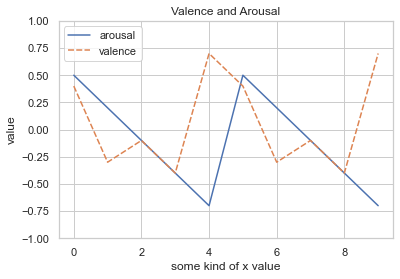

In [315]:
ax = sns.lineplot(data=av)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

In [ ]:
avMean = (df.iloc[:, 0:2]).mean()

avMeanTable = pd.DataFrame([avMean], columns=['Arousal', 'Valence'])
avMeanTable

,Arousal,Valence
0,0.092318,0.312806


[(-1.0, 1.0)]

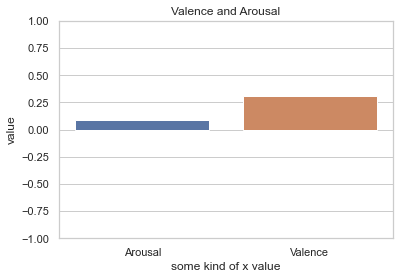

In [ ]:
ax = sns.barplot(data=avMeanTable)
ax.set(xlabel='some kind of x value', ylabel='value', title='Valence and Arousal')
ax.set(ylim=(-1, 1))

In [ ]:
#Expression only
expression = df.iloc[:, 2]

#Remap the integers into words
mapping = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}
expressionCategories = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

expressionLabeled = expression.map(mapping)

expression
expressionLabeled

0       Contempt
1        Neutral
2          Happy
3          Happy
4       Contempt
          ...   
1881    Contempt
1882    Contempt
1883    Contempt
1884    Contempt
1885     Neutral
Name: Expression, Length: 1886, dtype: object

[Text(0.5, 0, 'some kind of x value'),
 Text(0, 0.5, 'value'),
 Text(0.5, 1.0, 'Expressions')]

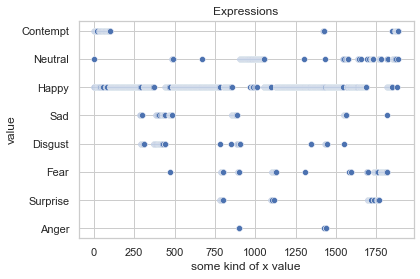

In [ ]:
ax = sns.scatterplot(data=expressionLabeled)

ax.set(xlabel='some kind of x value', ylabel='value', title='Expressions')
#ax.set(ylim=())

In [ ]:
checkOne = data_full.loc[(data_full['Please indicate your age'] == 66)]

#checkOne

NameError: name 'data_full' is not defined

In [ ]:
full_index = data_full.index
full_count = len(full_index)

index = data.index
count = len(index)

print("All data: " + str(full_count))
print("Usable data: " + str(count))


All data: 636
Usable data: 562


In [ ]:
df = data.iloc[:, 7:28]

df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", 
              "C7", "C8", "C9", "C10", "C11", "C12",
              "R13", "R14", "R15", "R16", "R17", "R18", "R19", "R20", "R21"]

df["Score"] = df.mean(axis = 1)
df["Gender"] = data["Please indicate your gender"]
df["Age"] = data["Please indicate your age"]
df["Country"]=data["Please indicate your country of residence"]

df

,A1,A2,A3,A4,A5,A6,C7,C8,C9,C10,C11,C12,R13,R14,R15,R16,R17,R18,R19,R20,R21,Score,Gender,Age,Country
0,1.0,1.0,1.0,5.0,2.0,2.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,3.333333,Female,32.0,USA
1,4.0,4.0,3.0,4.0,2.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.000000,Male,24.0,Germany
2,4.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.380952,Female,29.0,Ireland
3,2.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,3.0,2.0,3.0,3.428571,Female,34.0,Canada
4,3.0,2.0,2.0,4.0,1.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.428571,Male,41.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.857143,Female,66.0,USA
558,1.0,2.0,1.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,2.0,2.0,3.0,3.0,3.0,4.0,3.380952,Female,31.0,United States of America
559,3.0,4.0,4.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.000000,Female,23.0,Brazil
560,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.904762,Male,44.0,USA


## Demographic Information

In [ ]:
print("Age Mean: " + str(df["Age"].mean()))
print("Age STD: " + str(df["Age"].std()))

Age Mean: 29.11387900355872
Age STD: 8.606749387291162


In [ ]:
female = df.loc[(df['Gender'] == "Female", "A1")]
male = df.loc[(df['Gender'] == "Male", "A1")]
nonbinary = df.loc[(df['Gender'] == "Non-binary", "A1")]
other = df.loc[(df['Gender'] == "Other", "A1")]

print("Females: " + str(female.count()))
print("Males: " + str(male.count()))
print("Non-binary: " + str(nonbinary.count()))
print("Other: " + str(other.count()))

Females: 183
Males: 360
Non-binary: 18
Other: 1


In [ ]:
df['Country'] = df['Country'].str.capitalize()

df['Country'] = df['Country'].replace(['United States', 'United States of America', 'United States ', 'Usa', 'The United States of America', 'United states', 'Stationed in japan, real residence is us', 'United State', 'Usa', 'Texas', 'United states', 'U.S', 'U.S.A', 'United States of America ', 'Usa ', 'The united states of america', 'United states of america ', 'The united states', 'U.s.a', 'United states of america', 'United states ', 'Us', 'U.s', 'America', 'United state', '"united" states', 'North korea' ],'USA')

df['Country'] = df['Country'].replace(['Danmark'],'Denmark')
df['Country'] = df['Country'].replace(['Czech_republic', 'Czechia', 'Czech republic', 'Czech', 'Czech_republic '],'Czech Republic')
df['Country'] = df['Country'].replace(['United kingdom', 'England', 'Uk', 'United kingdom ', 'England ', 'England/uk'],'United Kingdom')
df['Country'] = df['Country'].replace(['The netherlands', 'Netherland', 'Netherlands ', 'Netherlands'],'The Netherlands')
df['Country'] = df['Country'].replace(['Canada (my father came from 🇩🇰 )😀', 'Canad', 'Canada '],'Canada')
df['Country'] = df['Country'].replace(['Gernany'],'Germany')
df['Country'] = df['Country'].replace(['México'],'Mexico')
df['Country'] = df['Country'].replace(['Hungary, europe', 'Hungary '],'Hungary')
df['Country'] = df['Country'].replace(['Poland '],'Poland')
df['Country'] = df['Country'].replace(['Bul'],'Bulgaria')
df['Country'] = df['Country'].replace(['United arab emirates', 'Uae'],'UAE')
df['Country'] = df['Country'].replace(['Republic of moldova'],'Moldova')
df['Country'] = df['Country'].replace(['New zealand'],'New Zealand')
df['Country'] = df['Country'].replace(['Norway '],'Norway')
df['Country'] = df['Country'].replace(['South africa', 'South africa '],'South Africa')
df['Country'] = df['Country'].replace(['Brasil'],'Brazil')
df['Country'] = df['Country'].replace(['Australia '],'Australia')

countries = df['Country'].value_counts().to_dict()

print (countries)

{'USA': 208, 'United Kingdom': 36, 'Canada': 31, 'Germany': 27, 'Sweden': 26, 'Australia': 21, 'Denmark': 21, 'The Netherlands': 15, 'Poland': 15, 'France': 15, 'Belgium': 9, 'Russia': 9, 'Czech Republic': 8, 'Norway': 8, 'Brazil': 7, 'Hungary': 7, 'Romania': 6, 'Italy': 6, 'South Africa': 6, 'Switzerland': 6, 'Greece': 6, 'Slovakia': 5, 'Finland': 5, 'Bulgaria': 4, 'Ireland': 4, 'Austria': 4, 'Serbia': 3, 'Ukraine': 3, 'Croatia': 3, 'Spain': 3, 'Mexico': 3, 'Chile': 3, 'Kuwait': 2, 'UAE': 2, 'Scotland': 2, 'Lithuania': 2, 'Turkey': 2, 'New Zealand': 2, 'Morocco': 2, 'Estonia': 2, 'Tunisia': 1, 'Venezuela': 1, 'Moldova': 1, 'Colombia': 1, 'Palestine': 1, 'Malta': 1, 'Portugal': 1, 'Guernsey': 1, 'India': 1, 'Japan': 1, 'Argentina': 1, 'Vietnam': 1, 'Philippines': 1}


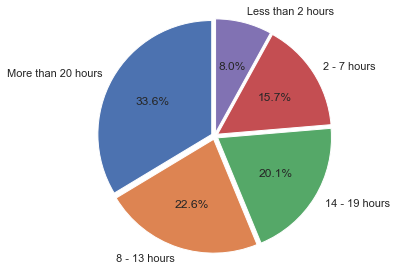

In [ ]:
hours = data['How many hours each week (on average) do you spend playing World of Warcraft: Shadowlands?'].value_counts()
labels = ['More than 20 hours', '8 - 13 hours', '14 - 19 hours', '2 - 7 hours', 'Less than 2 hours']

fig1, ax1 = plt.subplots()
ax1.pie(hours, autopct='%1.1f%%', labels=labels, shadow=False, startangle=90, radius=5, explode=[0.15]*5)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
#plt.title("Delivery Tips by type", fontsize=10);
plt.tight_layout()
plt.show()

In [ ]:
hours = data['How many hours each week (on average) do you spend playing World of Warcraft: Shadowlands?'].value_counts().to_dict()
hours

{'More than 20 hours a week': 189,
 '8 - 13 hours a week': 127,
 '14 - 19 hours a week': 113,
 '2 - 7 hours a week': 88,
 'Less than 2 hours a week': 45}

## Separate Questions & Scores

In [ ]:
autonomy = df.iloc[:, 0:6]
autonomy["Score"] = autonomy.mean(axis = 1)
autonomyScore = autonomy["Score"]

autonomy

,A1,A2,A3,A4,A5,A6,Score
0,1.0,1.0,1.0,5.0,2.0,2.0,2.000000
1,4.0,4.0,3.0,4.0,2.0,4.0,3.500000
2,4.0,5.0,4.0,4.0,4.0,5.0,4.333333
3,2.0,3.0,3.0,3.0,2.0,3.0,2.666667
4,3.0,2.0,2.0,4.0,1.0,2.0,2.333333
...,...,...,...,...,...,...,...
557,5.0,5.0,5.0,4.0,4.0,3.0,4.333333
558,1.0,2.0,1.0,2.0,3.0,2.0,1.833333
559,3.0,4.0,4.0,2.0,1.0,1.0,2.500000
560,5.0,5.0,5.0,5.0,5.0,5.0,5.000000


In [ ]:
competence = df.iloc[:, 6:12]
competence["Score"] = competence.mean(axis = 1)
competenceScore = competence["Score"]

competence

,C7,C8,C9,C10,C11,C12,Score
0,5.0,4.0,4.0,3.0,3.0,4.0,3.833333
1,5.0,5.0,5.0,3.0,4.0,4.0,4.333333
2,5.0,4.0,5.0,3.0,4.0,4.0,4.166667
3,4.0,4.0,4.0,4.0,4.0,4.0,4.000000
4,4.0,5.0,4.0,5.0,4.0,4.0,4.333333
...,...,...,...,...,...,...,...
557,4.0,4.0,4.0,3.0,3.0,3.0,3.500000
558,5.0,5.0,5.0,5.0,5.0,3.0,4.666667
559,5.0,5.0,5.0,2.0,5.0,4.0,4.333333
560,5.0,4.0,5.0,5.0,5.0,5.0,4.833333


In [ ]:
relate = df.iloc[:, 12:21]
relate["Score"] = relate.mean(axis = 1)
relateScore = relate["Score"]

relate

,R13,R14,R15,R16,R17,R18,R19,R20,R21,Score
0,5.0,4.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,3.888889
1,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.111111
2,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.555556
3,5.0,5.0,4.0,4.0,2.0,4.0,3.0,2.0,3.0,3.555556
4,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.555556
...,...,...,...,...,...,...,...,...,...,...
557,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.777778
558,5.0,5.0,5.0,2.0,2.0,3.0,3.0,3.0,4.0,3.555556
559,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.777778
560,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.888889


## Dataframe of all Scores

In [ ]:
scoreTable = pd.DataFrame(autonomy["Score"])
del scoreTable['Score']

scoreTable["Autonomy"] = autonomy["Score"]
scoreTable["Competence"] = competence["Score"]
scoreTable["Relatedness"] = relate["Score"]

scoreTable

,Autonomy,Competence,Relatedness
0,2.000000,3.833333,3.888889
1,3.500000,4.333333,4.111111
2,4.333333,4.166667,4.555556
3,2.666667,4.000000,3.555556
4,2.333333,4.333333,3.555556
...,...,...,...
557,4.333333,3.500000,3.777778
558,1.833333,4.666667,3.555556
559,2.500000,4.333333,4.777778
560,5.000000,4.833333,4.888889


In [ ]:
scoreTable.corr()

,Autonomy,Competence,Relatedness
Autonomy,1.000000,0.411086,0.419165
Competence,0.411086,1.000000,0.449146
Relatedness,0.419165,0.449146,1.000000


In [ ]:
pg.cronbach_alpha(scoreTable)

(0.6730018125981416, array([0.623, 0.717]))

## Dataframe of total means

In [ ]:
autonomySeparateMean = autonomy.mean()
autonomyTotalMean = autonomySeparateMean.mean()

competenceSeparateMean = competence.mean()
competenceTotalMean = competenceSeparateMean.mean()

relateSeparateMean = relate.mean()
relateTotalMean = relateSeparateMean.mean()

totalMeanTable = pd.DataFrame([[autonomyTotalMean, competenceTotalMean, relateTotalMean]], columns=['Autonomy', 'Competence', 'Relatedness'])
totalMeanTable

,Autonomy,Competence,Relatedness
0,3.242289,4.254152,3.655991


In [ ]:
scoreTable.std()

Autonomy       0.923261
Competence     0.656494
Relatedness    0.661777
dtype: float64

## Visualization

In [ ]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [ ]:
df = pd.DataFrame( {'':['Autonomy', 'Competence', 'Relatedness' ],
                   'val':[autonomyTotalMean, competenceTotalMean, relateTotalMean]})

#ax = df.plot.bar(x='', y='val', rot=0, figsize=(10,7), ylim = (1, 5), legend=False, title = 'Total mean comparison', color=['green', 'purple', 'blue'])

#ax.yaxis.grid(True)
#ax.set_ylabel('Mean', fontsize=10)
#ax.set_axisbelow(True)
#add_value_labels(ax)

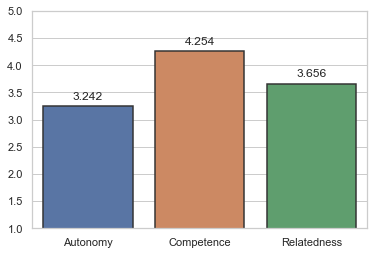

In [ ]:
ax = sns.barplot(data=totalMeanTable, linewidth=1.5, edgecolor=".2")
ax.set(ylim=(1, 5))
add_value_labels(ax)

In [ ]:
#boxplot = scoreTable.boxplot()

[(0.8, 5.2)]

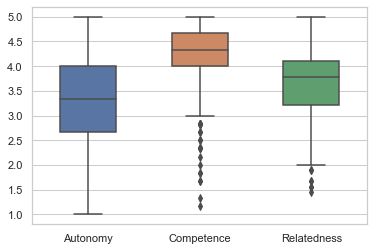

In [ ]:
ax = sns.boxplot(data=scoreTable, linewidth=1.5, width=0.5)
ax.set(ylim=(0.8, 5.2))

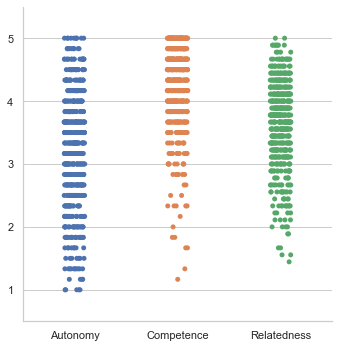

In [ ]:
ax1 = sns.catplot(kind = "strip", data = scoreTable)
ax1.set(ylim=(0.5, 5.5))

In [ ]:
#totalScore = (autonomy.mean(axis = 1) + competence.mean(axis = 1) + relate.mean(axis = 1))
#totalScore

# Parametric Tests

## Normal Distribution

              W      pval  normal
Score  0.981967  0.000002   False
AndersonResult(statistic=2.354961913320949, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


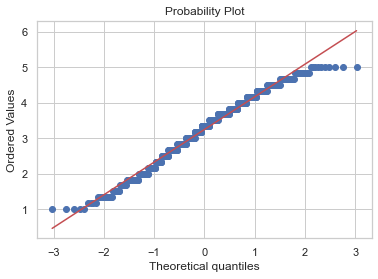

In [ ]:
print(pg.normality(autonomyScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(autonomyScore)) #Anderson-Darling test for normality
print(stats.anderson(autonomyScore)) #Anderson-Darling test for normality

stats.probplot(autonomyScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

              W          pval  normal
Score  0.885712  5.792157e-20   False
AndersonResult(statistic=14.038244542469783, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


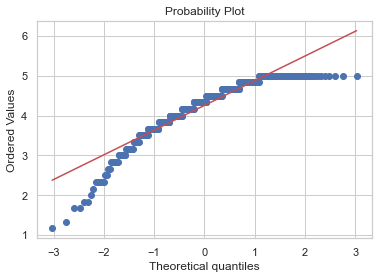

In [ ]:
print(pg.normality(competenceScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(competenceScore)) #Anderson-Darling test for normality
print(stats.anderson(competenceScore)) #Anderson-Darling test for normality

stats.probplot(competenceScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

              W          pval  normal
Score  0.973556  1.546499e-08   False
AndersonResult(statistic=3.728848459885967, critical_values=array([0.572, 0.651, 0.781, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


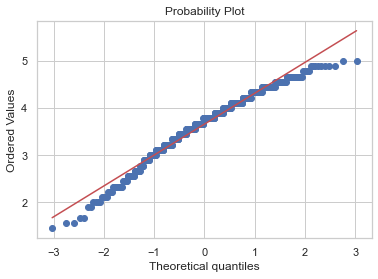

In [ ]:
print(pg.normality(relateScore)) #Shapiro-Wilk test for normality
#print(pg.anderson(relateScore)) #Anderson-Darling test for normality
print(stats.anderson(relateScore)) #Anderson-Darling test for normality

stats.probplot(relateScore, plot = plt) #Q-Q plot - visualization of normality
plt.show()

In [ ]:
result = stats.anderson(relateScore)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.729
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.781, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.084, data does not look normal (reject H0)


In [ ]:
stat, p = stats.shapiro(autonomyScore)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)


## Equal Variance

In [ ]:
print(stats.levene(autonomyScore, competenceScore))

LeveneResult(statistic=82.89052453005725, pvalue=3.8670696777549413e-19)


In [ ]:
print(stats.levene(competenceScore, relateScore))

LeveneResult(statistic=1.1061373540142343, pvalue=0.29314960199783535)


In [ ]:
print(stats.levene(autonomyScore, relateScore))

LeveneResult(statistic=68.47086085769473, pvalue=3.619096179845437e-16)


In [ ]:
print(stats.levene(autonomyScore, competenceScore, relateScore))

LeveneResult(statistic=54.463092864427885, pvalue=1.2047752449504271e-23)


## Parametric - Pearson's r

In [ ]:
#print(stats.pearsonr(autonomyScore, competenceScore))
print(pg.corr(autonomyScore, competenceScore))

           n         r         CI95%        r2    adj_r2         p-val       BF10  power
pearson  562  0.411086  [0.34, 0.48]  0.168992  0.166019  2.508854e-24  1.425e+21    1.0


In [ ]:
#print(stats.pearsonr(competenceScore, relateScore))
print(pg.corr(competenceScore, relateScore))

           n         r         CI95%        r2    adj_r2         p-val       BF10  power
pearson  562  0.449146  [0.38, 0.51]  0.201732  0.198876  2.977523e-29  1.057e+26    1.0


In [ ]:
#print(stats.pearsonr(autonomyScore, relateScore))
print(pg.corr(autonomyScore, relateScore))

           n         r         CI95%        r2   adj_r2         p-val       BF10  power
pearson  562  0.419165  [0.35, 0.49]  0.175699  0.17275  2.544942e-25  1.367e+22    1.0


## Non-Parametric - Spearman's ρ

In [ ]:
print(pg.corr(autonomyScore, competenceScore, method = 'spearman'))

            n         r         CI95%       r2    adj_r2         p-val  power
spearman  562  0.417325  [0.35, 0.48]  0.17416  0.171206  4.309265e-25    1.0


In [ ]:
print(pg.corr(competenceScore, relateScore, method = 'spearman'))

            n         r         CI95%        r2    adj_r2         p-val  power
spearman  562  0.400878  [0.33, 0.47]  0.160703  0.157701  4.140185e-23    1.0


In [ ]:
print(pg.corr(autonomyScore, relateScore, method = 'spearman'))

            n       r         CI95%       r2    adj_r2         p-val  power
spearman  562  0.4084  [0.34, 0.48]  0.16679  0.163809  5.296493e-24    1.0
